>**DATA ACQIUISATION**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hotel_cancellation_prdiction/hotel_bookings.csv")

In [3]:
data.shape

(119390, 32)

In [4]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#**DATA CLEANING**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000




*   The following columns previous_cancellations, previous_bookings_not_canceled, booking_changes days_in_waiting_list, required_car_parking_spaces, total_of_special_requests have only a maximum value. This shows that these features contribute to the decision of cancellation only in very few cases

**Assumptions about impact of features:**

*   High: hotel, lead_time, arrival_date_year, arrival_date_month, stays_in_weekend_nights, stays_in_week_nights, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, deposit_type, days_in_waiting_list, customer_type



*   Medium: children, babies, distribution_channel, booking_changes, adr


*  Low: arrival_date_week_number, arrival_date_day_of_month,country, meal, adults, market_segment, agent, company, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date

**Assumptions about cancellation:**


1.   The type of hotel decides the cancellation rate with higher cancellations in city hotels as compared to resort hotels due to variety of facilities available in resort hotels.

2.   The earlier the booking made, higher the chances of cancellation.
3.The earlier the booking made, higher the chances of cancellation.
4.As more children or babies are involved in the booking, higher chances of cancellation.
5.Old guest (is_repeated_guest=1) is less likely to cancel current booking.
6.If there are high previous cancellations, possibility of cancellation of current booking is also high.
7.If room assigned is not the same as reserved room type, customer might positively cancel the booking.
8.Higher the number of changes made to the booking, lesser is the chance of cancellation due to the investment of time in curating the booking as per one's requirement.
9.Bookings that are refundable or for which deposits were not made at the time of booking stand a high chance of cancellation.
10.If the number of days in waiting list is significant, customer might make some other booking due to uncertainty of confirmation of current booking.


**Target variable:**


*   is_canceled

**Cancellation Prediction:**

Wo what do we want to predict?



*   the number of cancellations over time
*   whether or not a given booking will be canceled
*   how likely it is that a given booking will be canceled
















#**Exploratory Data Analysis**

#**Univariate Analysis (Checking the validity of assumptions)**

percentage cancellation = 0.37041628277075134
Check-Out    0.629584
Canceled     0.360307
No-Show      0.010110
Name: reservation_status, dtype: float64


Text(0.5, 1.0, 'Reservation status vs Cancellations')

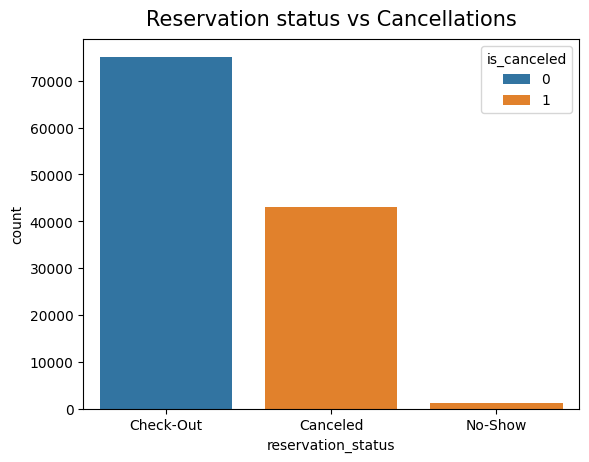

In [7]:
is_can=len(data[data['is_canceled']==1])

print("percentage cancellation =",is_can/len(data))
cancellation_types=data['reservation_status'].value_counts(normalize=True)
print(cancellation_types)

sns.countplot(data=data,x='reservation_status',hue='is_canceled')
plt.title("Reservation status vs Cancellations",fontsize=15,pad=10)


In [8]:
data['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

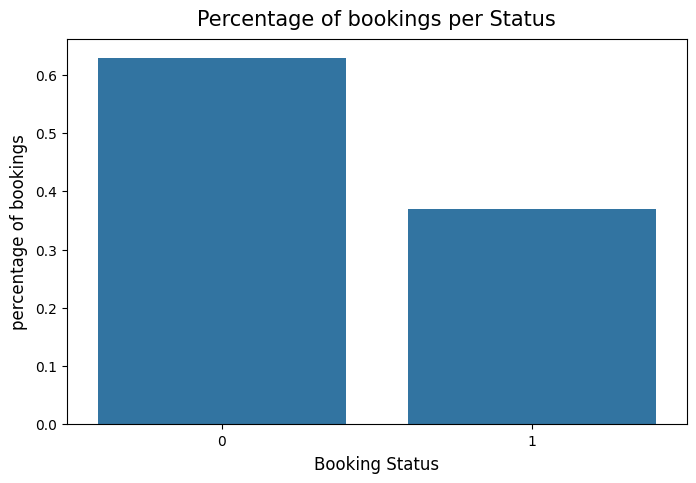

In [9]:
#vizualizing the percentage of cancelled vs not cancelled bookings:
plt.figure(figsize=(8,5))
plt.title("Percentage of bookings per Status",fontsize=15,pad=10)
sns.barplot(x=data['is_canceled'].unique(),y=data['is_canceled'].value_counts(normalize=True))
plt.xlabel("Booking Status",fontsize=12,labelpad=5)
plt.ylabel("percentage of bookings",fontsize=12,labelpad=5)
plt.xticks(ticks=[0,1],label=['Not cancelled','Canceled']);
plt.savefig('/content/drive/MyDrive/Colab Notebooks/hotel_cancellation_prdiction')

In [10]:
corr= data.corr(method = 'pearson')['is_canceled'][1:]
corr.sort_values(ascending = False)


<ipython-input-10-9273a3fbe7a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= data.corr(method = 'pearson')['is_canceled'][1:]


lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005048
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
company                          -0.020642
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
agent                            -0.083114
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

<ipython-input-11-438b11a91c78>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')


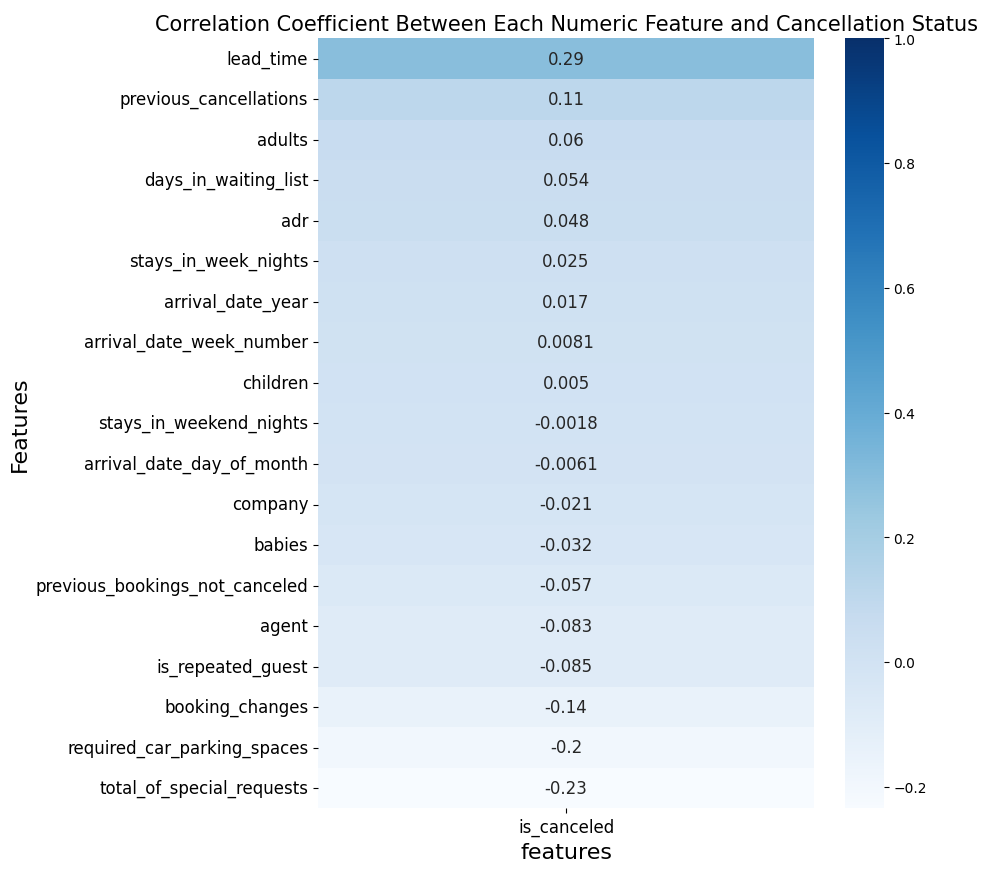

In [11]:
#visualizing correlation coefficients between features and cancellation:
fig=plt.figure(figsize=(8,10))
ax = sns.heatmap(data.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=15)
ax.set_xlabel('features',fontsize=16)
ax.set_ylabel('Features',fontsize=16)
ax.tick_params(axis='both',labelsize=12);
y_min,y_max=ax.get_ylim()
ax.set_ylim(top=y_max+1);
plt.savefig('/content/drive/MyDrive/Colab Notebooks/hotel_cancellation_prdiction')



*  Highest poitive correltions: lead_time followed by previous_cancellation

*   highest negative correlations:total_of_specil_requests,required _car_parking_spaces



Cancellations in resort hotel= 0.27763354967548676
Cancellations in resort hotel= 0.41726963317786464


Text(0.5, 1.0, 'Total count of bookings and cncellations per hotel')

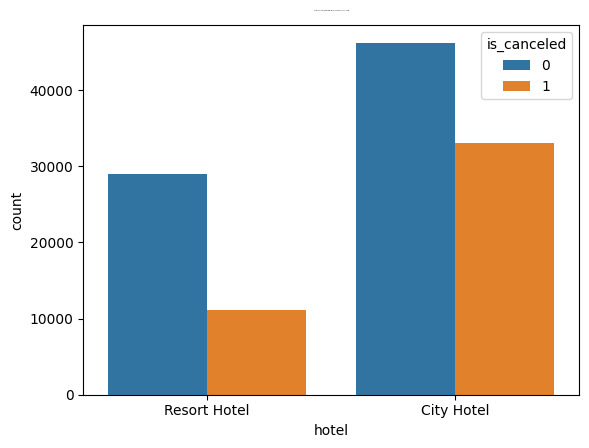

In [12]:
sns.countplot(data=data,x='hotel',hue='is_canceled')
resort_canceled=data[(data['hotel']=='Resort Hotel')&(data['is_canceled'])]
city_canceled=data[(data['hotel']=='City Hotel')&(data['is_canceled'])]

print("Cancellations in resort hotel=",(len(resort_canceled))/(len(data[data['hotel']=='Resort Hotel'])))
print("Cancellations in resort hotel=",(len(city_canceled))/(len(data[data['hotel']=='City Hotel'])))

plt.title("Total count of bookings and cncellations per hotel",fontsize=1,pad=10)

OUR 1st assumption ,city hotels have higher cancellation rate than hotels is valid (reasons for cancellation fr city hotel)

In [13]:
print(len(data[(data['stays_in_weekend_nights']==0) &(data['stays_in_week_nights']==0)]))

715


715 bookings don't have book weekday nights which could be an error in the data as this is not possible in real time scenario
Therefore there rows can be eliminated from the dataset

In [14]:
(len((data.loc[(data['children']!=0)|(data['babies']!=0)]))/(len(data)))*100

7.819750397855767

The no of customers or babies or both are only 8.00%(7.81%) of the totoal population.Therefore this information can beignored as it will not play a significantrole in deciding whether to cancel the booking or not .Assumption 4 can be discarded.

cancellation among the new guest=' 0.3778508392455442
cancellation among the old guest=' 0.14488188976377953


Text(0.5, 1.0, 'Total count of is repeated guest')

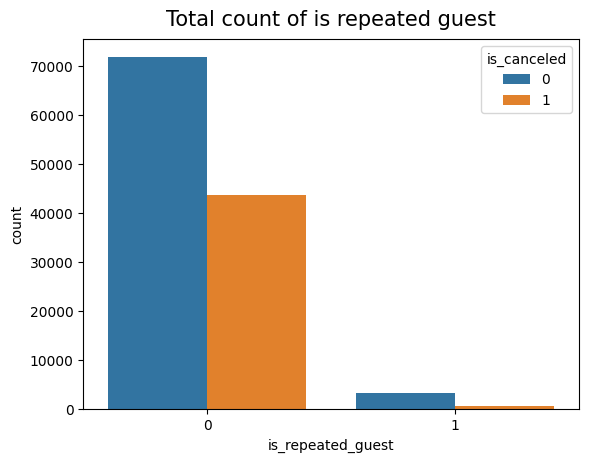

In [15]:
sns.countplot(data=data,x='is_repeated_guest',hue='is_canceled')

new_guest= data[(data['is_repeated_guest']==0)&(data['is_canceled']==1)]
old_guest= data[(data['is_repeated_guest']==1)&(data['is_canceled']==1)]

print("cancellation among the new guest='",(len(new_guest))/(len(data[data['is_repeated_guest']==0])))
print("cancellation among the old guest='",(len(old_guest))/(len(data[data['is_repeated_guest']==1])))

plt.title("Total count of is repeated guest",fontsize=15,pad=10)

THE number of customers hav

As seen in the correlation table,the above graph is the evidence that maximum customers and they are likely to cancel their current booking.Old guest are likely to cancel the booking(14%).assumption 5 holds TRUE.

Text(0.5, 1.0, 'Total count of previous cancellations')

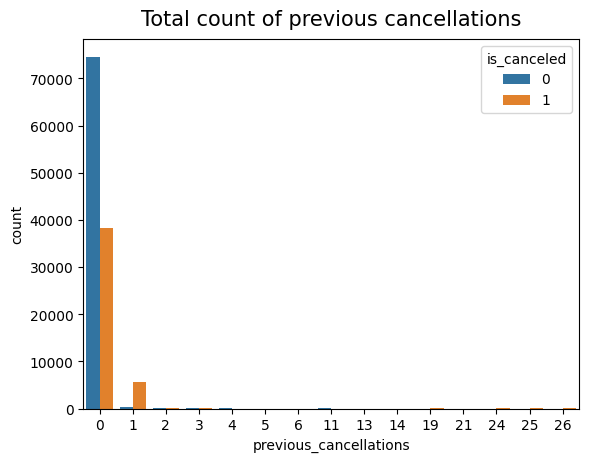

In [16]:
sns.countplot(data=data,x='previous_cancellations',hue='is_canceled')
plt.title("Total count of previous cancellations",fontsize=15,pad=10)

MAximum customers have 0 previous cancellation. They are likely to cancle the current booking.However customers who have cancelled once earlier are more likely to cancel the current booking. This also matches with the positive correlation between previous_cancellations and  is_canceled and supports Assumption 6

In [17]:
temp=data.loc[data['reserved_room_type']!=data['assigned_room_type']]
temp['is_canceled'].value_counts(normalize=True)*100

0    94.623584
1     5.376416
Name: is_canceled, dtype: float64

Assumption 7 that there more cancellation whenn assigned room type is diffrent from reserved room type is not valid. There are only 5% cancellation in such a case.

Text(0.5, 1.0, 'booking Changes vs Cancellations')

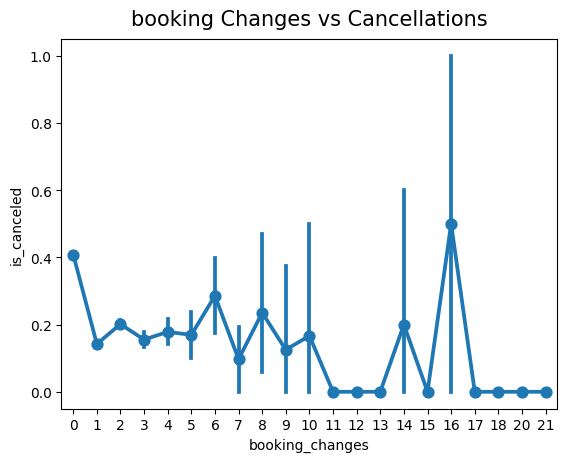

In [18]:
sns.pointplot(data=data,x='booking_changes',y='is_canceled')
plt.title("booking Changes vs Cancellations",fontsize=15,pad=10)

Assumtions 8 about the booking does not hold as there in it impact on the cancellation of bookings.


Text(0.5, 1.0, 'Cancellation vs Depoit type')

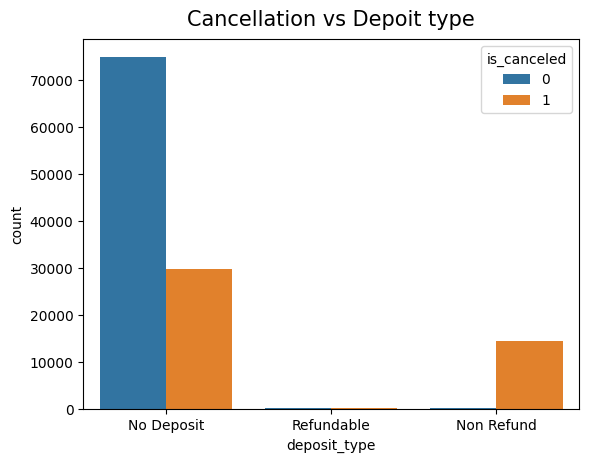

In [19]:
sns.countplot(x="deposit_type",hue="is_canceled",data=data);
plt.title("Cancellation vs Depoit type",fontsize=15,pad=10)

>>Contarary t assumption 9,boking that are non _refundable are canceled.


Text(0.5, 1.0, 'Date in waiting VS cancellations')

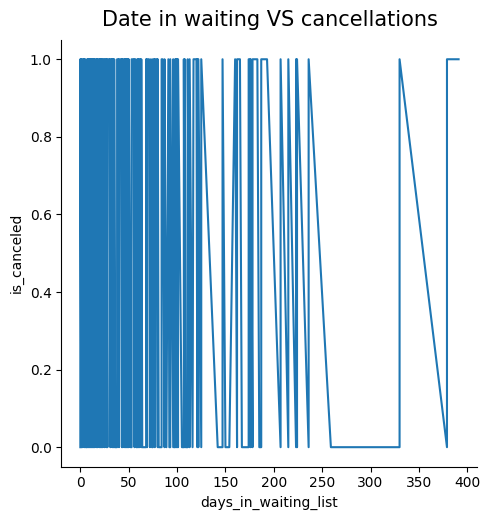

In [20]:
sns.relplot(data=data , x='days_in_waiting_list', y='is_canceled', kind='line',estimator=None)
plt.title("Date in waiting VS cancellations", fontsize=15, pad=10)


No relation can be established between days_in_waiting_list and is_canceled. Therefore, we will take this feature for further analysis.



>>Assumption 10 can be discarded.



In [21]:
year_cancelations= data.groupby(['arrival_date_year'])['is_canceled'].sum()
year_cancelations

arrival_date_year
2015     8142
2016    20337
2017    15745
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'TOtal number of bookings per year')

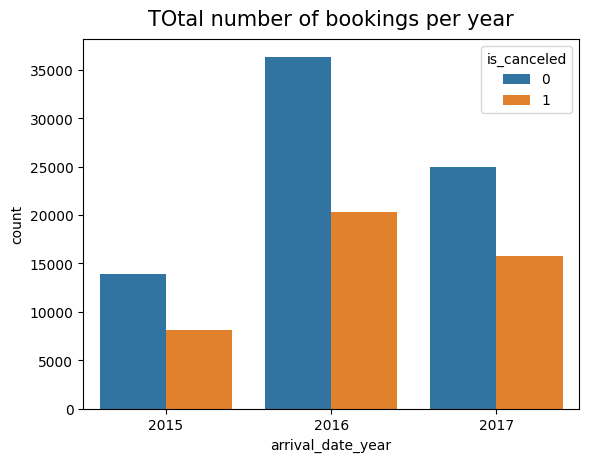

In [22]:
sns.countplot(data=data,x='arrival_date_year',hue='is_canceled')
plt.title("TOtal number of bookings per year",fontsize=15,pad=10)

In [23]:
max_bookings=data.groupby(['arrival_date_month'])['is_canceled'].count().sort_values(ascending=False)
print(max_bookings)

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: is_canceled, dtype: int64


Text(0.5, 1.0, 'Total number of bookings per month')

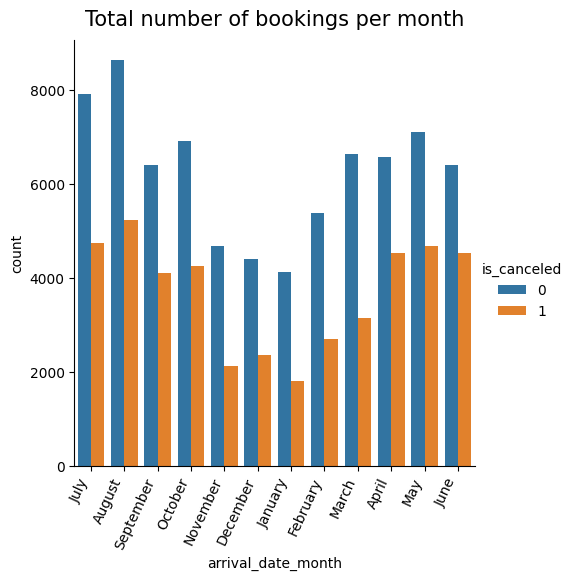

In [24]:
chart=sns.catplot(data=data,x='arrival_date_month',hue='is_canceled',kind='count')
chart.set_xticklabels(rotation=65,horizontalalignment='right')
plt.title('Total number of bookings per month',fontsize=15,pad=10)

>**Maximum bookings in the year 2016 were in the months of July and August.**

In [25]:
year_count =data.groupby(['arrival_date_year','is_canceled']).size().to_frame(name='count')
year_perct=year_count.groupby(level=0).apply(lambda x:100*x/float(x.sum()))
print(year_perct)

month_count=data.groupby(['arrival_date_month','is_canceled']).size().to_frame(name='count')
month_perct=month_count.groupby(level=0).apply(lambda x:100*x/float(x.sum()))
print(month_perct)


                                   count
arrival_date_year is_canceled           
2015              0            62.984179
                  1            37.015821
2016              0            64.136703
                  1            35.863297
2017              0            61.302136
                  1            38.697864
                                    count
arrival_date_month is_canceled           
April              0            59.202814
                   1            40.797186
August             0            62.246883
                   1            37.753117
December           0            65.029499
                   1            34.970501
February           0            66.584036
                   1            33.415964
January            0            69.522685
                   1            30.477315
July               0            62.546402
                   1            37.453598
June               0            58.542828
                   1            41.457172


<ipython-input-25-eb6fe2907065>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  year_perct=year_count.groupby(level=0).apply(lambda x:100*x/float(x.sum()))
<ipython-input-25-eb6fe2907065>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  month_perct=month_count.groupby(level=0).apply(lambda x:10

Text(0.5, 1.0, 'distriburtion of cancellations in various channels')

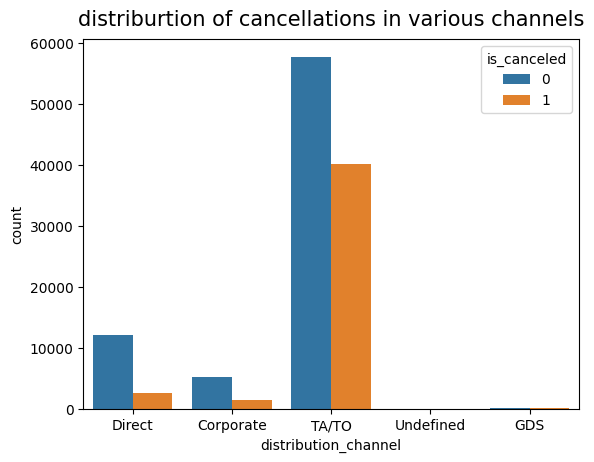

In [26]:
sns.countplot(data=data,x='distribution_channel',hue='is_canceled')
plt.title("distriburtion of cancellations in various channels",fontsize=15,pad=10)


Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: customer_type, dtype: float64


Text(0.5, 1.0, 'average Number of cancellations in a each category')

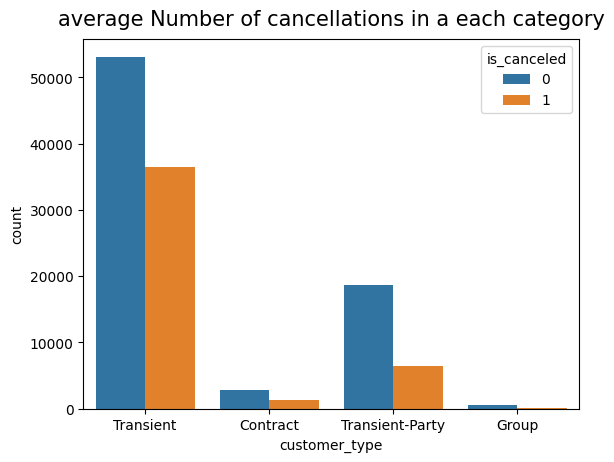

In [27]:
print(data['customer_type'].value_counts(normalize=True)*100)
sns.countplot(data=data,x='customer_type',hue='is_canceled')
plt.title("average Number of cancellations in a each category",fontsize=15,pad=10)


>75% bookings occur in Transient category of customers. It also sees the highest cancellation among all the categories.



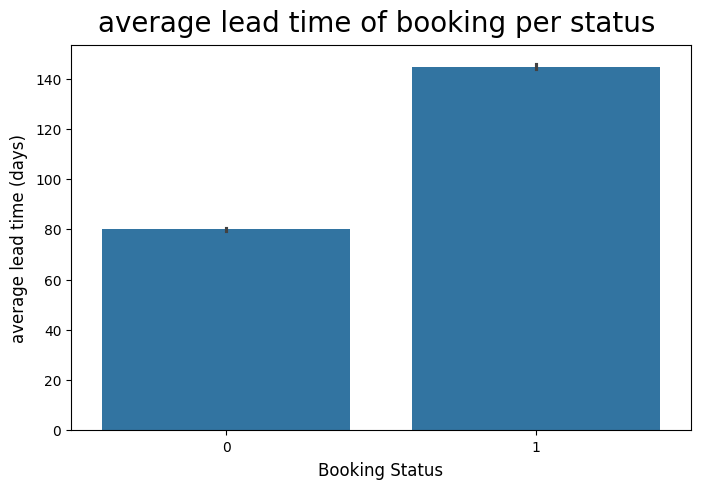

In [28]:
#VIzualizing the average lead time for canceled and not canceled bookings:
plt.figure(figsize=(8,5))
plt.title("average lead time of booking per status ",fontsize=20,pad=10)
sns.barplot(x=data['is_canceled'],y=data['lead_time'])
plt.xlabel("Booking Status",fontsize=12,labelpad=5)
plt.ylabel("average lead time (days)",fontsize=12,labelpad=5)
plt.xticks(ticks=[0,1],label=['NOt canceled','Canceled']);
plt.savefig("/content/drive/MyDrive/Colab Notebooks/hotel_cancellation_prdiction")

Maximum cancellations occur if the booking is made 60-70 days before the check-in date. Longer the lead_time, lower is the cancellation. This invalidates our 2nd assumption.



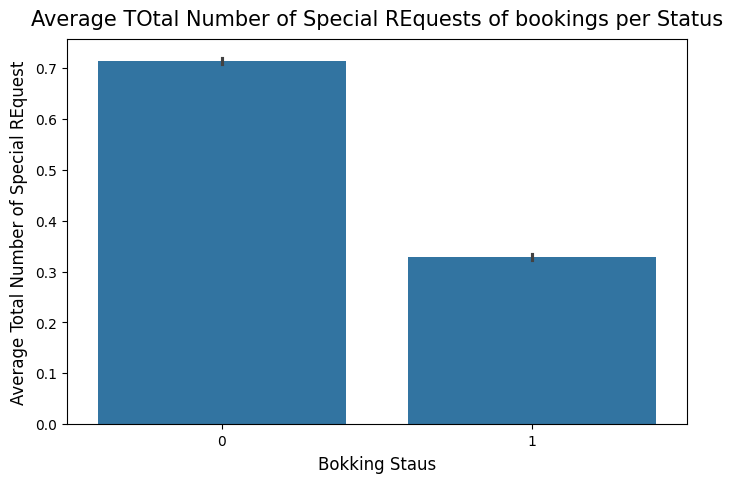

In [29]:
#visualizing the tol number of special requests for canceled and nort canceled bookings:
plt.figure(figsize=(8,5))
plt.title("Average TOtal Number of Special REquests of bookings per Status",fontsize=15,pad=10)
sns.barplot(x=data['is_canceled'],y=data['total_of_special_requests'])
plt.xlabel("Bokking Staus",fontsize=12,labelpad=5)
plt.ylabel("Average Total Number of Special REquest",fontsize=12,labelpad=5)
plt.xticks(ticks=[0,1],label=['Not Canceled','Canceled']);
plt.savefig("/content/drive/MyDrive/Colab Notebooks/hotel_cancellation_prdiction")

>Interpretation: Customers who cancel their bookings make on average fewer special requests. Potential reasons why were discussed above.



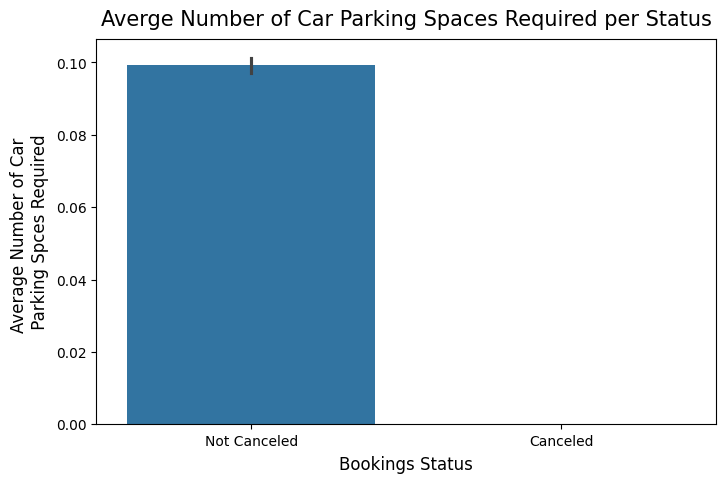

In [30]:
#Visualizing the totl of requested parking spaces for canceled and not canceled bookings:

plt.figure(figsize=(8,5))
plt.title("Averge Number of Car Parking Spaces Required per Status",fontsize=15,pad=10)
sns.barplot(x=data['is_canceled'],y=data['required_car_parking_spaces'])
plt.xlabel("Bookings Status",fontsize=12,labelpad=5)
plt.ylabel("Average Number of Car \n Parking Spces Required ",fontsize=12,labelpad=5)
plt.xticks(ticks=[0,1],labels=["Not Canceled",'Canceled']);
plt.savefig("/content/drive/MyDrive/Colab Notebooks/hotel_cancellation_prdiction.png")

Interpretation: On average, customers who do not cancel their bookings tend to require more parking spaces. Similarly to the number of special requests, it would make sense that the more a customer engages with the hotel (by putting in a request for a parking spot), the less likely they are to cancel. It is also fair to think that by the time a guest is thinking about where they will park their car, they are most likely pretty commited to their destination. Finally, thinking about this from the hotel perpective, it is possible that not many hotels around have a parking. As a result, the need for a parking space would limit the customer in their hotel options and make them less likely to cancel. More information would be required from the hotel directly to confirm this theory. However, if true, this suggests that adding parking spaces could be a way to help reduce cancellations.



Text(0, 0.5, 'Percentage of Bookings Cancled')

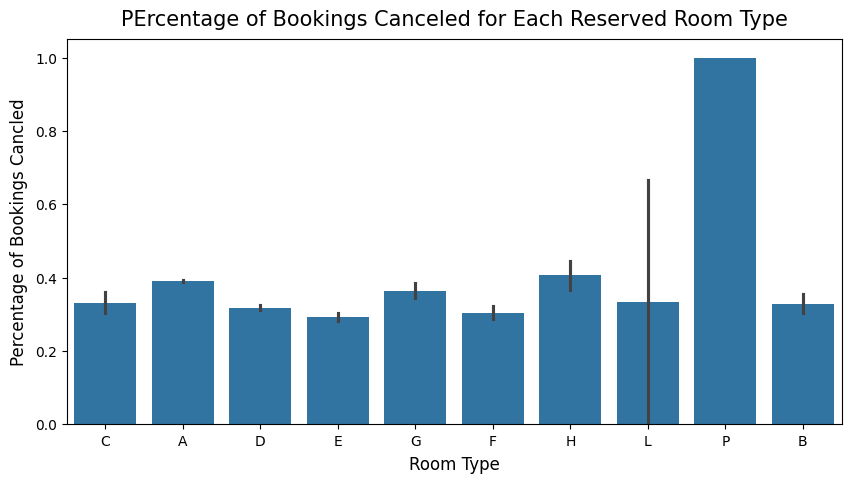

In [31]:
#Visualizing percentage of bookings canceled for each room type:
plt.figure(figsize=(10,5))
plt.title("PErcentage of Bookings Canceled for Each Reserved Room Type",fontsize=15,pad=10)
sns.barplot(x=data['reserved_room_type'],y=data['is_canceled'])
plt.xlabel("Room Type",fontsize=12,labelpad=5)
plt.ylabel("Percentage of Bookings Cancled",fontsize=12,labelpad=5)

Interpretation:

Customers who reserved room type P have the highest percentage booking cancellation with 100% of bookings canceled. As the dataset did not provide the actual room designations for anonymity purposes, it is hard to interpret why bookings of room type P are canceled more often.



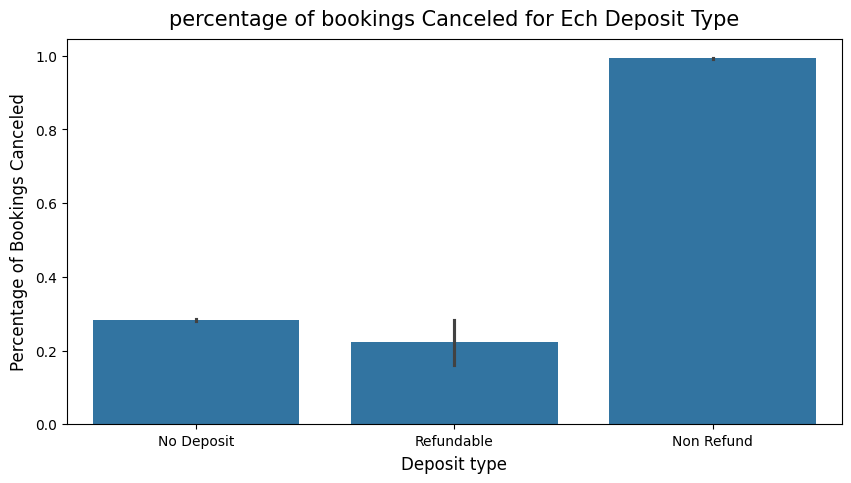

In [32]:
#Visualization percentage of bookings canceled for each deposit type:
plt.figure(figsize=(10,5))
plt.title("percentage of bookings Canceled for Ech Deposit Type",fontsize=15,pad=10)
sns.barplot(x=data['deposit_type'],y=data['is_canceled'])
plt.xlabel("Deposit type",fontsize=12,labelpad=5)
plt.ylabel("Percentage of Bookings Canceled",fontsize=12,labelpad=5)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/hotel_cancellation_prdiction/deposit_type_bookings_cancelled.png")

**Interpretation**

Surprisingly, customers who pay a non-refundable deposit have a much higher percentage of canceled reservations. As this is a counter-intuitive finding, it is necessary to dig a little deeper into the characteristics of bookings with a non-refundable deposit.



In [33]:
data['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

#**Multivariate Analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


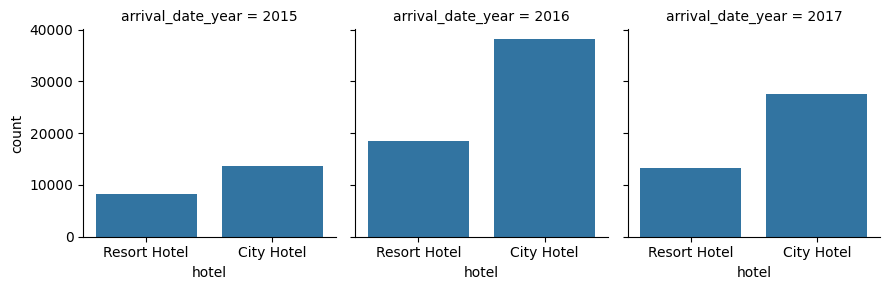

In [34]:
grid=sns.FacetGrid(data,col='arrival_date_year')
grid.map(sns.countplot,'hotel')

In all three years city hotels saw more bookings than reor hostels.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


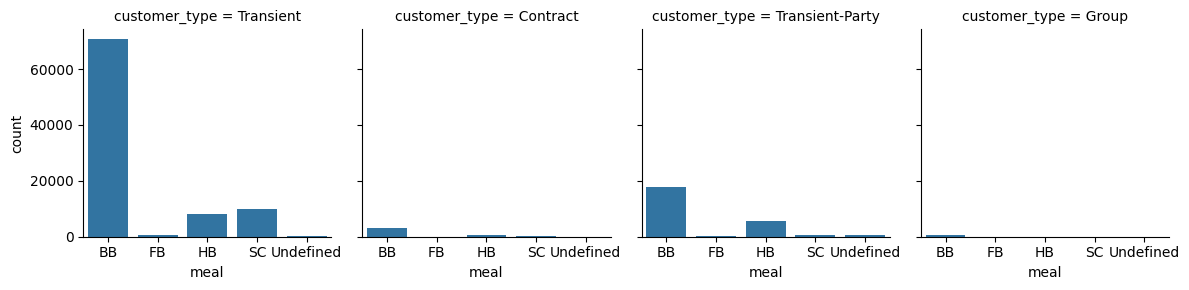

In [35]:
data["meal"].nunique(),data['customer_type'].nunique()
grid=sns.FacetGrid(data,col='customer_type')
grid.map(sns.countplot,'meal')

Mainly all kinds of customers prefer BB type meals.

In [36]:
data.pivot_table(columns='hotel',values='country',aggfunc=lambda x:x.mode())

hotel,City Hotel,Resort Hotel
country,PRT,PRT


People from country wiyth Iso 'PRT made the most number of bookings in both types of hotels.

Text(0.5, 1.0, 'Reversed room type booked vs Hotel')

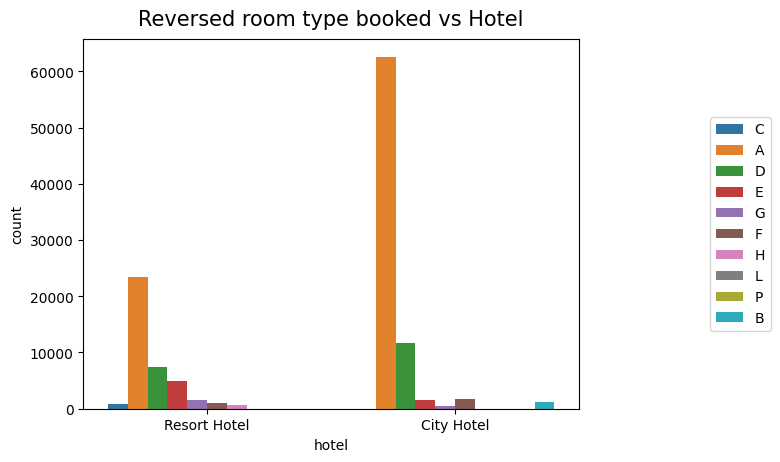

In [37]:
g=sns.countplot(data=data,x='hotel',hue= 'reserved_room_type')
g.legend(loc='center left',bbox_to_anchor=(1.25,0.5),ncol=1)
plt.title("Reversed room type booked vs Hotel",fontsize=15,pad=10)

Resort hotels Room preference:A,D,E
Cityhotels room preference:A,D,F

In [38]:
print("TABLE 1")
print(data.groupby(['hotel','customer_type']).size())

TABLE 1
hotel         customer_type  
City Hotel    Contract            2300
              Group                293
              Transient          59404
              Transient-Party    17333
Resort Hotel  Contract            1776
              Group                284
              Transient          30209
              Transient-Party     7791
dtype: int64


For each kind of hotel,

*   TRansient type of customers are the highest
*  followed by transient Party
*   Group bookings are the least






In [39]:
print(data.groupby(['customer_type','deposit_type']).size())

customer_type    deposit_type
Contract         No Deposit       3530
                 Non Refund        544
                 Refundable          2
Group            No Deposit        569
                 Refundable          8
Transient        No Deposit      76684
                 Non Refund      12909
                 Refundable         20
Transient-Party  No Deposit      23858
                 Non Refund       1134
                 Refundable        132
dtype: int64


Each category of customer book hotels without deposit.Surpringly between refundable and non-refundable type,**higher number of people book hostels that are non-refundable**

In [40]:
print(data.groupby(['customer_type','distribution_channel']).size())

customer_type    distribution_channel
Contract         Corporate                  27
                 Direct                     19
                 TA/TO                    4030
Group            Corporate                  31
                 Direct                    116
                 TA/TO                     430
Transient        Corporate                4157
                 Direct                  12343
                 GDS                       193
                 TA/TO                   72919
                 Undefined                   1
Transient-Party  Corporate                2462
                 Direct                   2167
                 TA/TO                   20491
                 Undefined                   4
dtype: int64


In [41]:
print(data.groupby(['customer_type','market_segment']).size())

customer_type    market_segment
Contract         Complementary         2
                 Corporate            22
                 Direct               14
                 Groups              735
                 Offline TA/TO      1817
                 Online TA          1486
Group            Aviation              2
                 Complementary         6
                 Corporate            29
                 Direct              134
                 Groups               16
                 Offline TA/TO       211
                 Online TA           179
Transient        Aviation            218
                 Complementary       703
                 Corporate          3576
                 Direct            11336
                 Groups             8427
                 Offline TA/TO     14054
                 Online TA         51299
Transient-Party  Aviation             17
                 Complementary        32
                 Corporate          1668
                 Direct  

In [42]:
print(data.groupby(['hotel','distribution_channel']).size())

hotel         distribution_channel
City Hotel    Corporate                3408
              Direct                   6780
              GDS                       193
              TA/TO                   68945
              Undefined                   4
Resort Hotel  Corporate                3269
              Direct                   7865
              TA/TO                   28925
              Undefined                   1
dtype: int64


In [43]:
print(data.groupby(['hotel','market_segment']).size())

hotel         market_segment
City Hotel    Aviation            237
              Complementary       542
              Corporate          2986
              Direct             6093
              Groups            13975
              Offline TA/TO     16747
              Online TA         38748
              Undefined             2
Resort Hotel  Complementary       201
              Corporate          2309
              Direct             6513
              Groups             5836
              Offline TA/TO      7472
              Online TA         17729
dtype: int64


Combining table1 and above table,we see the relation between frequent customer types at each and their mode of booking.THis information can be used to focus on customized publicity stratrgies.Similariy the maarket segments can be analyzed for a more customer centric approach.Hotel type wit ditrbution channel and market segment can also be analysed.

In [44]:
group=data.groupby(['customer_type','reservation_status']).size()
group_pcts=group.groupby(level=0).apply(lambda x:100*x/ float(x.sum()))
group_pcts

<ipython-input-44-018dd43ce10b>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  group_pcts=group.groupby(level=0).apply(lambda x:100*x/ float(x.sum()))


customer_type    reservation_status
Contract         Canceled              30.323847
                 Check-Out             69.038273
                 No-Show                0.637880
Group            Canceled               9.532062
                 Check-Out             89.774697
                 No-Show                0.693241
Transient        Canceled              39.678395
                 Check-Out             59.253680
                 No-Show                1.067925
Transient-Party  Canceled              24.554211
                 Check-Out             74.570132
                 No-Show                0.875657
dtype: float64

In [45]:
data.pivot_table(columns='hotel',values='total_of_special_requests',aggfunc=lambda x:x.sum())

hotel,City Hotel,Resort Hotel
total_of_special_requests,43387,24828


Text(0.5, 1.0, 'Days in waiting vs Hostel')

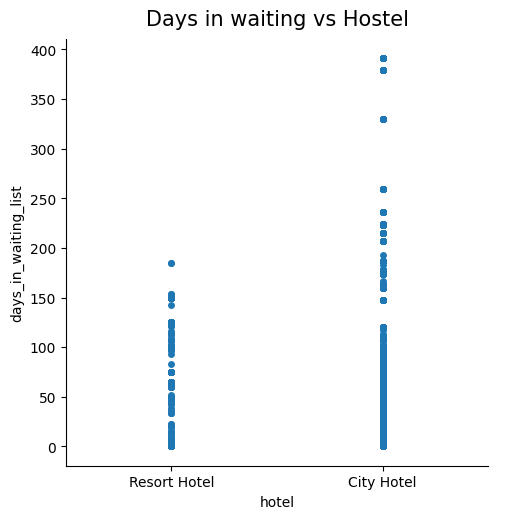

In [46]:
sns.catplot(data=data,x='hotel',y='days_in_waiting_list',jitter=False)
plt.title("Days in waiting vs Hostel",fontsize=15,pad=10)

As it is seen,city hotels have much larger waiting time in days compared t resort hotels which may signify that their demand is higher.

In [47]:
data['country'].value_counts(normalize=True)*100

PRT    40.865587
GBR    10.200838
FRA     8.759314
ESP     7.205934
DEU     6.128576
         ...    
DJI     0.000841
BWA     0.000841
HND     0.000841
VGB     0.000841
NAM     0.000841
Name: country, Length: 177, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


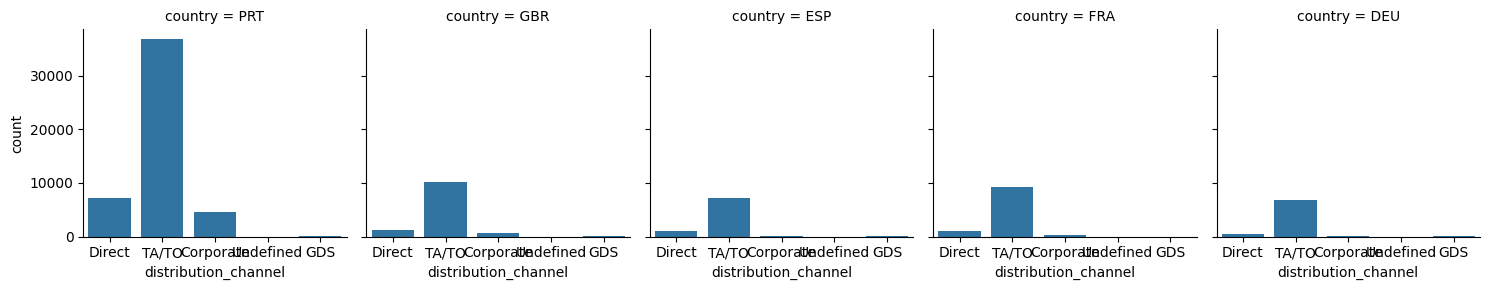

In [48]:
temp = data.loc[(data['country'] == 'PRT') | (data['country'] == 'GBR') | (data['country'] == 'FRA') | (data['country'] == 'ESP') | (data['country'] == 'DEU')]
grid=sns.FacetGrid(temp,col='country')
grid.map(sns.countplot,'distribution_channel')

Using this information hotels can implement mdels of publicity for getting more bookings in the top 5 countries from whre most of their customers fall.

<ipython-input-49-229660f85d5e>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data,x='customer_type',y='total_of_special_requests',ci=None)


Text(0.5, 1.0, 'Total Number of Special REquests of BOOKings Per customer type ')

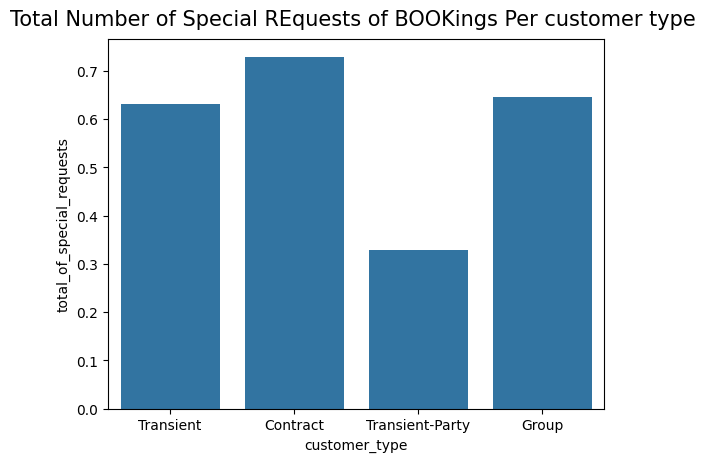

In [49]:
sns.barplot(data=data,x='customer_type',y='total_of_special_requests',ci=None)
plt.title("Total Number of Special REquests of BOOKings Per customer type ",fontsize=15,pad=10)

Text(0.5, 1.0, 'Average lead time per distribution channel')

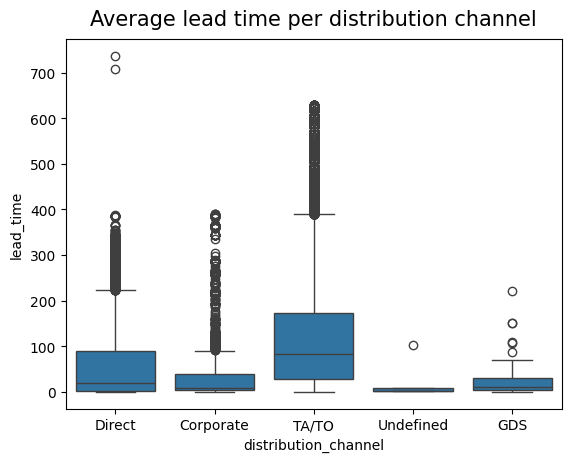

In [50]:
sns.boxplot(data=data, x='distribution_channel', y='lead_time')
plt.title("Average lead time per distribution channel", fontsize = 15, pad = 10)


In [51]:
data.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


##**FEATURE ENGINNERING**

In [52]:
month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
data.arrival_date_month = data.arrival_date_month.map(month_map).astype(int)


In [53]:
data['arrival_date'] = data['arrival_date_year'].astype(str)+'-'+data['arrival_date_month'].astype(str)+'-'+data['arrival_date_day_of_month'].astype(str)


In [54]:
def roomChange(row):
  if row['assigned_room_type']==row['reserved_room_type']:
    return False
  else:
    return True

data['change_in_room']=data.apply(roomChange,axis=1)

In [55]:
data['children']=data['children'].fillna(0)
data['offspring']=(data['children']+ data['babies']).astype(int)

In [56]:
data['total_bookings']=data['previous_cancellations']+data['previous_bookings_not_canceled']

In [59]:
data['country'].fillna(data['country'].mode()[0],inplace=True)
data['agent'].fillna(data['agent'].mode()[0],inplace=True)
data['company'].fillna(data['company'].mode()[0],inplace=True)

In [61]:
for i in range(len(data)):
  if data.loc[i,'country']=='PRT':
    data.at[i,'country']=1
  elif data.loc[i,'country']=='GBR':
    data.at[i,'country']=2
  else:data.at[i,'country']=0

In [64]:
data['reservation_status_date']=pd.to_datetime(data['reservation_status_date'])
data['arrival_date']=pd.to_datetime(data['arrival_date'])

In [68]:
data['stay_duration']=data['reservation_status_date']-data['arrival_date']
data['stay_duration']=data['stay_duration']/np.timedelta64(1,'D')
data['stay_duration']=data['stay_duration'].astype(int)

In [69]:
for i in range (len(data)):
  if data.loc[i,'stay_duration']<0:
    data.at[i,'stay_duration']=-1

In [70]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'change_in_room', 'offspring', 'total_bookings', 'stay_duration'],
      dtype='object')

In [71]:
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country']
for item in var:
    data[item] = lb.fit_transform(data[item])


In [72]:
data = pd.get_dummies(data, columns=['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country'])


In [73]:
data.drop(['meal', 'assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date', 'arrival_date'], axis = 1, inplace = True)


#PREPARATIONS

In [75]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.dummy import DummyClassifier


#Separate features and predicted values

In [77]:
#Separate feature and pre dicted value
X=data.drop(columns=['is_canceled'],axis=1)
y= data['is_canceled']

#TRAIN-TEST SPLIT

lets divide the data into training and validation sets:


In [78]:
#70% for training ,30% for validation

#Xtrain,X_Test,y_train,y_test=
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size = 0.7, test_size = 0.15)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((83573, 50), (83573,), (17909, 50), (17909,))

#Scaling

In [79]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)


In [80]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)


#**Prediction using various models**

#**Logistic Regression**

In [81]:
# Construct Grid Parameters
lg_params = {
    'penalty': ['l1'],
    'C': [3.5],
    'max_iter': [300]
}

# Perform Grid Search
lg_gs = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), lg_params, cv = 5, scoring = 'accuracy')
lg = lg_gs.fit(X_train, y_train)


In [82]:
# Scoring
print(f'Best Training Accuracy: {lg.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {lg.score(X_test, y_test)}')
print(f'Cross-val-score: {cross_val_score(lg.best_estimator_, X, y, cv=StratifiedKFold(shuffle=True)).mean()}')


Best Training Accuracy: 0.999270099194716
Best Testing Accuracy: 0.9992741079903958
Cross-val-score: 0.9990618979814055


In [83]:
#Logistic Regression

logreg = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)
scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)
logreg_pred = logreg.predict(X_test_mm)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
confusion_matrix(y_test, logreg_pred)


Average cross validation score: 0.991
Test accuracy: 0.991
F1 score: 0.987


array([[11268,     7],
       [  159,  6475]])

#**Decision Tree Classifier**

In [84]:
#Decision Tree

tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv = 5)
tree_pred = tree.predict(X_test)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))


Average cross validation score: 0.994
Test accuracy: 0.994
F1 score: 0.992
[[11170   105]
 [    0  6634]]


#**Random Forest Classifier**

In [85]:
#Random Forest

rforest= RandomForestClassifier(random_state = 0, n_jobs = -1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv = 5)
rforest_pred = rforest.predict(X_test)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, rforest_pred)))
print(confusion_matrix(y_test, rforest_pred))


Average cross validation score: 0.994
Test accuracy: 0.994
F1 score: 1.000
[[11274     1]
 [    0  6634]]


#**Adaboost Boosted Classifier**

In [86]:
#Adaboost Classifier
ada = AdaBoostClassifier().fit(X_train, y_train)
ada_pred = ada.predict(X_test)
scores = cross_val_score(ada, X_train, y_train, cv = 5)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(ada.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, ada_pred)))
print(confusion_matrix(y_test, ada_pred))


Average cross validation score: 0.999
Test accuracy: 1.000
F1 score: 1.000
[[11272     3]
 [    1  6633]]


In [87]:
def classifier(train, test, estimator, param_grid):
    grid_search = GridSearchCV(estimator, param_grid, cv=5)
    grid_search.fit(train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    print("Test score: {:.3f}".format(grid_search.score(test, y_test)))

def feature_selection(model):
    select_features = SelectFromModel(estimator=model, threshold='median')
    select_features.fit(X_train, y_train)
    X_train_select = select_features.transform(X_train)
    X_test_select = select_features.transform(X_test)
    return X_train_select, X_test_select

def run_model(model, model_feature, param_grid):
    print("Before feature selection:")
    classifier(X_train, X_test, model, param_grid)
    X_train_select, X_test_select = feature_selection(model_feature)
    print("After feature selection")
    classifier(X_train_select, X_test_select, model, param_grid)


In [88]:
#Random Forest
param_grid = {'n_estimators':[50,75,100], 'max_depth':[1,2,5]}
run_model(RandomForestClassifier(), RandomForestClassifier(n_estimators=50, max_depth=2), param_grid)


Before feature selection:
Best parameters: {'max_depth': 5, 'n_estimators': 100}
Best score: 0.9977983145276926
Test score: 0.999
After feature selection
Best parameters: {'max_depth': 5, 'n_estimators': 75}
Best score: 0.9982410542751378
Test score: 0.998


In [90]:
#Gradient Boosted Classifier
param_grid = {'max_depth':[1,2,5], 'learning_rate':[1,0.1,0.001]}
run_model(GradientBoostingClassifier(), GradientBoostingClassifier(learning_rate=0.001), param_grid)

Before feature selection:
Best parameters: {'learning_rate': 0.1, 'max_depth': 5}
Best score: 0.9995213743730593
Test score: 1.000
After feature selection
Best parameters: {'learning_rate': 0.1, 'max_depth': 5}
Best score: 0.9995572717067137
Test score: 1.000
